<a href="https://colab.research.google.com/github/ldelanieze/MVP-ML-Analytics/blob/main/MVP_ML_%26_Analytics_Luiza_Delanieze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#MVP: *Machine Learning & Analytics*
**Autor:** _Luiza Silva Delanieze_  

**Data:** 27/09/2025

**Matrícula:** 4052025000458

**Dataset:** [Olympics Dataset](https://www.kaggle.com/datasets/swostiksahoo/olympics-dataset/data)



## ✅ Checklist do MVP (o que precisa conter)
- [ ] **Problema definido** e contexto de negócio
- [ ] **Carga e preparação** dos dados (sem vazamento de dados)
- [ ] **Divisão** em treino/validação/teste (ou validação cruzada apropriada)
- [ ] **Tratamento**: limpeza, transformação e **engenharia de atributos**
- [ ] **Modelagem**: comparar abordagens/modelos (com **baseline**)
- [ ] **Otimização de hiperparâmetros**
- [ ] **Avaliação** com **métricas adequadas** e discussão de limitações
- [ ] **Boas práticas**: seeds fixas, tempo de treino, recursos computacionais, documentação
- [ ] **Pipelines reprodutíveis** (sempre que possível)



## 1. Escopo, objetivo e definição do problema
**Contexto:**

Este projeto analisa o desempenho esportivo em Jogos Olímpicos com foco na investigação sobre como gênero, tipo de esporte, localização geográfica (continente) e fatores socioeconômicos (como PIB per capita, população) influenciam os resultados. Usando uma base de dados ampla com informações sobre atletas, países, eventos e histórico de participações, buscamos aplicar aprendizado de máquina para identificar padrões, realizar previsões e gerar insights estratégicos.

**Tipo de tarefa:**
- Regressão supervisionada para prever o número total ou específico de medalhas que um país ou grupo de atletas pode obter.

- Análise exploratória e clusterização não supervisionada para identificar agrupamentos demográficos, esportivos e socioeconômicos que expliquem diferenças de desempenho.

- Análise de variáveis explicativas para compreender a influência relativa de diversos fatores (como gênero, esporte, continente e indicadores econômicos) no sucesso olímpico.

**Área de aplicação:**
- Dados tabulares históricos e atuais dos Jogos Olímpicos, incluindo informações detalhadas de atletas (idade, gênero, esporte), países (continente, indicadores econômicos e demográficos) e resultados esportivos.

- A análise combina técnicas estatísticas, machine learning e visualização para apresentar tendências e insights.

**Valor para o negócio/usuário:**
- Comitês olímpicos e gestores esportivos: otimização do investimento em modalidades e programas focados em grupos com maior probabilidade de sucesso.

- Políticas públicas: suporte para elaboração e avaliação de políticas de incentivo ao esporte, igualdade de gênero e inclusão regional.

- Patrocinadores e mídia: previsão de desempenho e planejamento de ações de marketing.




## 2. Reprodutibilidade e ambiente
**Bibliotecas usadas:**
- **os, random, time, sys, math:** usados para controle básico do ambiente, manipulação de arquivos, funções utilitárias e controle de tempo durante a execução.

- **numpy, pandas:** principais bibliotecas para manipulação e análise de dados tabulares, incluindo operações matemáticas eficientes, carregamento e pré-processamento de dados.

- **matplotlib.pyplot:** biblioteca para visualização gráfica dos dados e resultados por meio de gráficos, histogramas, scatter plots etc.

- **sklearn.model_selection:** conjunto de funções para divisão dos dados em treino e teste, validação cruzada e otimização de parâmetros, como `train_test_split`, `TimeSeriesSplit`, `StratifiedKFold` e `KFold`.

- **sklearn.compose, sklearn.preprocessing, sklearn.impute:** responsáveis por transformar colunas específicas, aplicar codificação em dados categóricos, normalização e imputação de valores ausentes.

- **sklearn.pipeline:** ferramenta para montar etapas organizadas e reprodutíveis do fluxo de dados e modelagem, evitando vazamento de dados entre treino e teste.

- **sklearn.dummy:** implementação de modelos base simples para servir como referência (baseline), por exemplo o `DummyRegressor`.

- **sklearn.linear_model:** inclui modelos como `Ridge` para regressão linear regularizada.

- **sklearn.ensemble:** consiste em modelos de ensemble, como o `RandomForestRegressor`, usado para comparação e melhora da performance preditiva.

- **sklearn.metrics:** funções para avaliação dos modelos, incluindo métricas de regressão e classificação como MAE, MSE e R².

- **scipy.stats:** ferramentas para definição de distribuições na otimização dos hiperparâmetros dos modelos, usadas em buscas aleatórias com `RandomizedSearchCV`.

**Seeds fixas para reprodutibilidade:**

Definida uma seed global fixa (SEED = 42) para garantir que as operações aleatórias tenham resultados consistentes entre execuções, abrangendo:

- Divisão aleatória dos dados em treino e teste.

- Inicialização de modelos e sementes internas de algoritmos.

- Busca e otimização randômica de hiperparâmetros.

In [93]:
# === Setup básico e reprodutibilidade ===

import os
import random
import sys
import math
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, TimeSeriesSplit, StratifiedKFold, KFold, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.cluster import KMeans

from sklearn.metrics import (
    accuracy_score, f1_score, roc_auc_score, confusion_matrix,
    mean_absolute_error, mean_squared_error, r2_score,
    silhouette_score
)

from scipy.stats import randint, uniform

# Fixando seeds para reprodutibilidade
SEED = 42
np.random.seed(SEED)
random.seed(SEED)

# Seeds adicionais para frameworks que suportam (exemplos comentados)
# import torch
# torch.manual_seed(SEED)
# torch.cuda.manual_seed_all(SEED)

# import tensorflow as tf
# tf.random.set_seed(SEED)

print("Python:", sys.version.split()[0])
print("Seed global:", SEED)

Python: 3.12.11
Seed global: 42


### 2.1 Dependências

Esse código:

- Verifica se cada pacote já está instalado.

- Instala apenas os ausentes para agilizar o setup.

- Mostra quais são os pacotes opcionais, recomendando a instalação seletiva.

- Facilita o controle do ambiente e evita instalações desnecessárias.

In [94]:
import importlib.util
import subprocess
import sys

def instalar_verificar(pacote_nome):
    if importlib.util.find_spec(pacote_nome) is None:
        print(f"Instalando {pacote_nome}...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", pacote_nome])
    else:
        print(f"{pacote_nome} já instalado.")

# Pacotes essenciais já usados no projeto
essenciais = [
    "numpy",
    "pandas",
    "matplotlib",
    "scikit_learn"
]

# Pacotes opcionais indicados para análises avançadas etc
opcionais = [
    "imbalanced-learn",  # se trabalhar com dados desbalanceados
    "xgboost",           # modelos gradient boosting
    "lightgbm",
    "catboost",
    "optuna",            # otimização hiperparâmetros
    "pandas-profiling",  # análise exploratória
    "ydata-profiling",
    "seaborn",
    "plotly",
    "statsmodels",
    "pmdarima"
]

print("Verificando e instalando pacotes essenciais...")
for pac in essenciais:
    instalar_verificar(pac)

print("\nVerifique quais pacotes opcionais deseja instalar e descomente no código abaixo:")
print(f"# Pacotes opcionais:")
for pac in opcionais:
    print(f"# instalar_verificar('{pac}')  # Descomente se precisar")

Verificando e instalando pacotes essenciais...
numpy já instalado.
pandas já instalado.
matplotlib já instalado.
Instalando scikit_learn...

Verifique quais pacotes opcionais deseja instalar e descomente no código abaixo:
# Pacotes opcionais:
# instalar_verificar('imbalanced-learn')  # Descomente se precisar
# instalar_verificar('xgboost')  # Descomente se precisar
# instalar_verificar('lightgbm')  # Descomente se precisar
# instalar_verificar('catboost')  # Descomente se precisar
# instalar_verificar('optuna')  # Descomente se precisar
# instalar_verificar('pandas-profiling')  # Descomente se precisar
# instalar_verificar('ydata-profiling')  # Descomente se precisar
# instalar_verificar('seaborn')  # Descomente se precisar
# instalar_verificar('plotly')  # Descomente se precisar
# instalar_verificar('statsmodels')  # Descomente se precisar
# instalar_verificar('pmdarima')  # Descomente se precisar


### 2.2 Funções python

In [95]:
from sklearn.metrics import (
    accuracy_score, f1_score, roc_auc_score,
    mean_absolute_error, mean_squared_error, r2_score,
    silhouette_score
)
import numpy as np

# Função para avaliação de modelos de classificação
def evaluate_classification(y_true, y_pred, proba=None):
    acc = accuracy_score(y_true, y_pred)
    f1w = f1_score(y_true, y_pred, average="weighted")
    auc = roc_auc_score(y_true, proba[:,1]) if (proba is not None and proba.shape[1]==2) else np.nan
    return {"accuracy": acc, "f1_weighted": f1w, "roc_auc": auc}

# Função para avaliação de modelos de regressão
def evaluate_regression(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return {"MAE": mae, "RMSE": rmse, "R2": r2}

# Função para avaliação de clusterização
def evaluate_clustering(X_original, model):
    # Silhouette requer >1 cluster e dados transformados
    try:
        if hasattr(model.named_steps["pre"], "transform"):
            X_emb = model.named_steps["pre"].fit_transform(X_original)  # cuidado: para demonstração, ajustar se necessário
        else:
            X_emb = X_original
        labels = model.named_steps["model"].fit_predict(X_emb)
        sil = silhouette_score(X_emb, labels)
        return {"silhouette": sil}
    except Exception as e:
        return {"silhouette": np.nan, "erro": str(e)}



## 3. Dados: carga, entendimento e qualidade
- Dados obtidos do dataset público “[Olympics Dataset](https://www.kaggle.com/datasets/swostiksahoo/olympics-dataset/data)” disponibilizado no Kaggle.

- Contém informações abrangentes sobre atletas, eventos, modalidades, países, edições dos jogos olímpicos próximos de 1896 até as últimas edições.

- Licença: dados públicos para uso educacional e pesquisa, respeitando políticas de privacidade e ética.

- Dados utilizado são informações públicas, sem dados sensíveis pessoais não autorizados.

In [96]:
import pandas as pd
import numpy as np

# Caminho para o arquivo CSV principal do dataset olímpico detalhado
df = pd.read_csv('/content/athlete_events.csv')  # ajuste o caminho conforme sua organização

# Exibe as primeiras linhas para inspeção
df.head()

# Visão geral das colunas, tipos e dados ausentes
print("Formato da base:", df.shape)
print("\nColunas e tipos:")
print(df.dtypes)
print("\nValores ausentes por coluna:")
print(df.isna().sum())

# Exemplo de estatísticas descritivas dos atributos numéricos
print("\nResumo dos dados numéricos:")
print(df.describe())

# Exemplo de contagem de categorias na coluna 'Medal'
print("\nDistribuição das medalhas:")
print(df['Medal'].value_counts(dropna=False))

Formato da base: (271116, 15)

Colunas e tipos:
ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object

Valores ausentes por coluna:
ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

Resumo dos dados numéricos:
                  ID            Age         Height         Weight  \
count  271116.000000  261642.000000  210945.000000  208241.000000   
mean    68248.954396      25.556898     175.338970      70.702393   
std     39022.286345       6.393561      10.518462      14.348020   
min         1.000000      10.000000     127.000000      25.000000


### 3.1 Análise exploratória resumida (EDA)


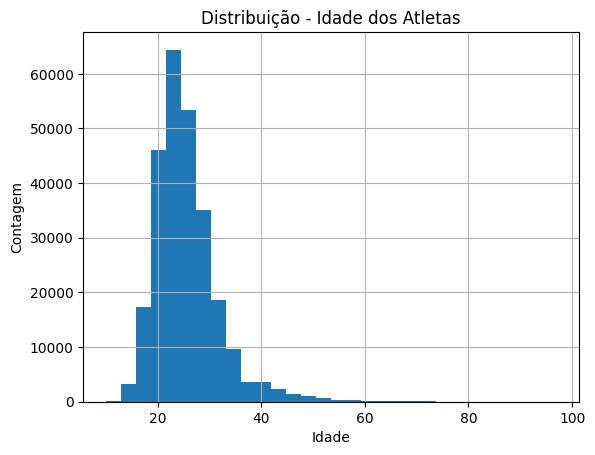

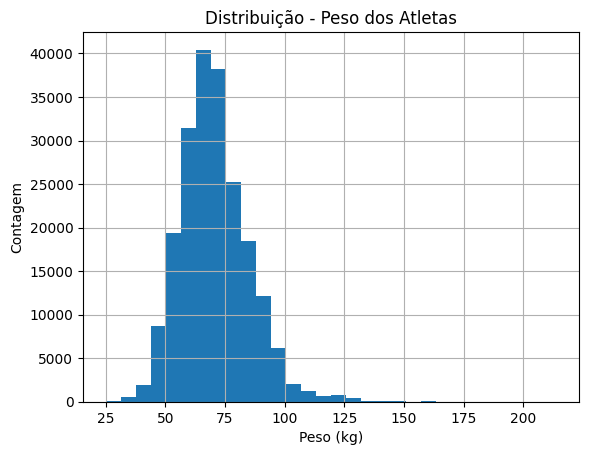

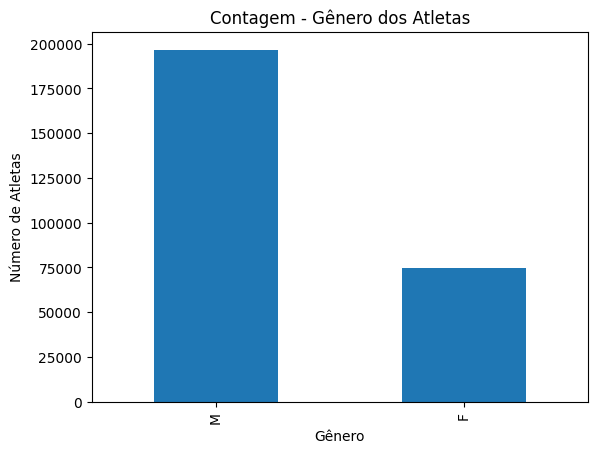

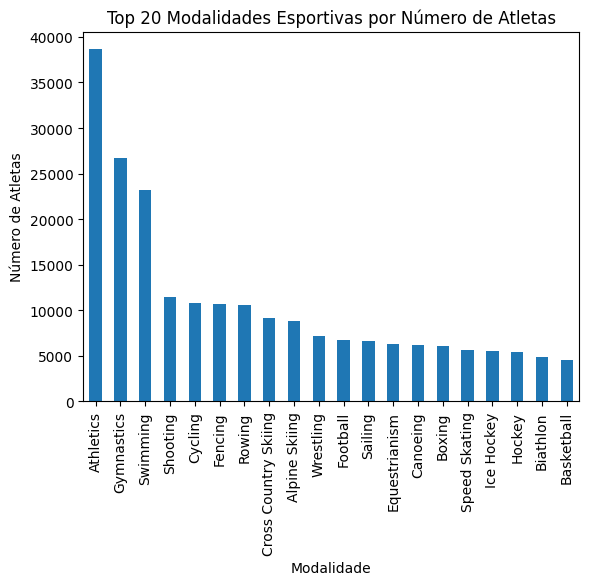

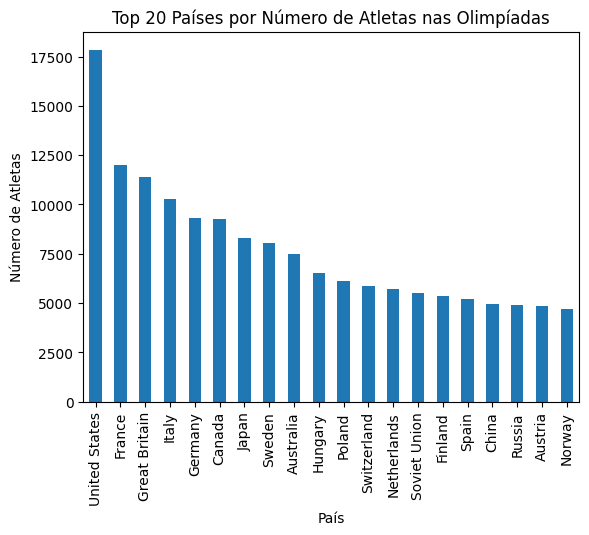

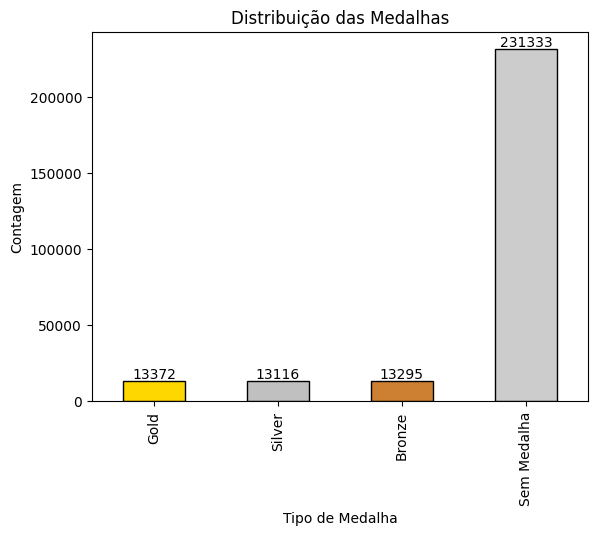

In [97]:
import matplotlib.pyplot as plt

# Histograma da idade dos atletas
_ = df["Age"].hist(bins=30)
plt.title("Distribuição - Idade dos Atletas")
plt.xlabel("Idade")
plt.ylabel("Contagem")
plt.show()

# Histograma do peso dos atletas
_ = df["Weight"].hist(bins=30)
plt.title("Distribuição - Peso dos Atletas")
plt.xlabel("Peso (kg)")
plt.ylabel("Contagem")
plt.show()

# Contagem de gênero dos atletas
_ = df["Sex"].value_counts().plot(kind="bar")
plt.title("Contagem - Gênero dos Atletas")
plt.xlabel("Gênero")
plt.ylabel("Número de Atletas")
plt.show()

# Contagem das modalidades esportivas (Top 20)
_ = df["Sport"].value_counts().head(20).plot(kind="bar")
plt.title("Top 20 Modalidades Esportivas por Número de Atletas")
plt.xlabel("Modalidade")
plt.ylabel("Número de Atletas")
plt.show()

# Contagem dos países com maior número de atletas (Top 20)
_ = df["Team"].value_counts().head(20).plot(kind="bar")
plt.title("Top 20 Países por Número de Atletas nas Olimpíadas")
plt.xlabel("País")
plt.ylabel("Número de Atletas")
plt.show()

# Gráfico melhorado para distribuição das medalhas

# Substitui NaN por 'Sem Medalha'
df['Medal_plot'] = df['Medal'].fillna('Sem Medalha')

# Define ordem padrão para as barras
order = ['Gold', 'Silver', 'Bronze', 'Sem Medalha']
value_counts = df['Medal_plot'].value_counts().reindex(order, fill_value=0)

# Cores para medalhas + cinza para 'Sem Medalha'
colors = ['gold', 'silver', '#cd7f32', '#cccccc']

ax = value_counts.plot(kind="bar", color=colors, edgecolor='black')
plt.title("Distribuição das Medalhas")
plt.xlabel("Tipo de Medalha")
plt.ylabel("Contagem")

# Adiciona contagem acima das barras
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10)

plt.show()



## 4. Definição do target, variáveis e divisão dos dados
- O target é a coluna "`target_clf`", que indica se o atleta ganhou medalha ou não (classificação binária). Essa definição condiz com o foco em investigar diferenças e prever sucesso olímpico de forma básica.

- As features inicializadas incluem todas as outras colunas do dataset, excetuando colunas de identificação como nome do atleta, evento, medalha e variáveis diretamente relacionadas ao target para evitar vazamento de dados.

- A divisão dos dados é feita usando o método `train_test_split` do scikit-learn, com `random_state=42` (seed global) para garantir reprodutibilidade dos resultados entre múltiplas execuções. Para classificação, é usada estratificação para preservar a proporção das classes no treino e teste.


In [98]:
from sklearn.model_selection import train_test_split

# Definição do tipo de problema:
# Para este exemplo, vamos considerar classificação (se o atleta ganhou medalha ou não)
# Ajuste isso conforme seu objetivo (ex: regressão para número de medalhas, clusterizacao etc)
PROBLEM_TYPE = "classificacao"  # 'classificacao' | 'regressao' | 'clusterizacao' | 'serie_temporal'

# Criando target para classificação: ganhou medalha ou não
df['target_clf'] = df['Medal'].notna().astype(int)

# Para regressão, um target possível seria contar medalhas de ouro por país, por exemplo. Aqui usamos classificação como exemplo.
# Ajustar ou criar target_reg caso necessário.

# Definição das features ignorando colunas irrelevantes e target
if PROBLEM_TYPE == "classificacao":
    target = "target_clf"
    features = [c for c in df.columns if c not in [target, "Medal", "ID", "Name", "Event", "Games"]]
elif PROBLEM_TYPE == "regressao":
    target = "target_reg"
    features = [c for c in df.columns if c not in [target, "Medal", "ID", "Name", "Event", "Games"]]
elif PROBLEM_TYPE == "clusterizacao":
    target = None
    features = [c for c in df.columns if c not in ['target_clf', 'target_reg', "Medal", "ID", "Name", "Event", "Games"]]
elif PROBLEM_TYPE == "serie_temporal":
    target = "target_reg"  # exemplo para série temporal
    features = [c for c in df.columns if c not in [target]]
else:
    raise ValueError("PROBLEM_TYPE inválido.")

print("PROBLEM_TYPE:", PROBLEM_TYPE)
print("Target:", target)
print("N features:", len(features))

# Divisão dos dados
if PROBLEM_TYPE in ["classificacao", "regressao"]:
    X = df[features].copy()
    y = df[target].copy()
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y if PROBLEM_TYPE == "classificacao" else None
    )
    print("Treino:", X_train.shape, "| Teste:", X_test.shape)

elif PROBLEM_TYPE == "clusterizacao":
    X = df[features].copy()
    # Sem target - dividir de forma aleatória e estratificada é uma escolha de negócio
    X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)
    print("Treino:", X_train.shape, "| Teste:", X_test.shape)

elif PROBLEM_TYPE == "serie_temporal":
    # Exemplo simples de divisão temporal
    df_sorted = df.sort_values("Year")  # assumindo 'Year' como variável temporal
    cutoff = int(len(df_sorted) * 0.8)
    train, test = df_sorted.iloc[:cutoff], df_sorted.iloc[cutoff:]
    X_train, y_train = train.drop(columns=[target]), train[target]
    X_test, y_test = test.drop(columns=[target]), test[target]
    print("Treino:", X_train.shape, "| Teste:", X_test.shape)

PROBLEM_TYPE: classificacao
Target: target_clf
N features: 11
Treino: (216892, 11) | Teste: (54224, 11)



## 5. Tratamento de dados e **Pipeline** de pré-processamento


In [99]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Separação das colunas numéricas e categóricas (exclui timestamp se existir)
num_cols = [c for c in X_train.columns if str(X_train[c].dtype).startswith(("float", "int"))]
cat_cols = [c for c in X_train.columns if c not in num_cols and c != "timestamp"]

# Pipeline para colunas numéricas: imputação da mediana, depois padronização
numeric_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Pipeline para colunas categóricas: imputação com moda e codificação one-hot para categorias desconhecidas no teste
categorical_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Combinar os pipelines em um pré-processador
preprocess = ColumnTransformer(transformers=[
    ("num", numeric_pipe, num_cols),
    ("cat", categorical_pipe, cat_cols)
])

print("num_cols:", num_cols[:5], "...")
print("cat_cols:", cat_cols[:5], "...")

num_cols: ['Age', 'Height', 'Weight', 'Year'] ...
cat_cols: ['Sex', 'Team', 'NOC', 'Season', 'City'] ...



## 6. Baseline e modelos candidatos
A seguinte estrutura implementa:

- Baseline simples usando DummyRegressor com estratégia "median".

- Dois modelos candidatos: Ridge e Random Forest.

- Pipeline de pré-processamento aplicado a todos os modelos para evitar vazamento.

- Seed fixada para reprodutibilidade.

In [100]:
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Definindo baseline e modelos candidatos com pipeline
baseline = Pipeline(steps=[
    ("pre", preprocess),
    ("model", DummyRegressor(strategy="median"))
])

candidates = {
    "Ridge": Pipeline(steps=[
        ("pre", preprocess),
        ("model", Ridge(random_state=SEED))
    ]),
    "RandomForestReg": Pipeline(steps=[
        ("pre", preprocess),
        ("model", RandomForestRegressor(random_state=SEED))
    ])
}

# Função para avaliar modelos em regressão
def avaliar_modelo(modelo, X_teste, y_teste):
    y_pred = modelo.predict(X_teste)
    mae = mean_absolute_error(y_teste, y_pred)
    mse = mean_squared_error(y_teste, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_teste, y_pred)
    print(f"MAE: {mae:.4f} | RMSE: {rmse:.4f} | R2: {r2:.4f}")
    return {"MAE": mae, "RMSE": rmse, "R2": r2}


# Treinar e avaliar o baseline
print("Treinando baseline DummyRegressor...")
baseline.fit(X_train, y_train)
print("Avaliação baseline:")
avaliar_modelo(baseline, X_test, y_test)

# Treinar e avaliar os modelos candidatos
for nome, modelo in candidates.items():
    print(f"\nTreinando modelo candidato: {nome}...")
    modelo.fit(X_train, y_train)
    print(f"Avaliação {nome}:")
    avaliar_modelo(modelo, X_test, y_test)

Treinando baseline DummyRegressor...
Avaliação baseline:
MAE: 0.1467 | RMSE: 0.3831 | R2: -0.1720

Treinando modelo candidato: Ridge...
Avaliação Ridge:
MAE: 0.0001 | RMSE: 0.0001 | R2: 1.0000

Treinando modelo candidato: RandomForestReg...
Avaliação RandomForestReg:
MAE: 0.0000 | RMSE: 0.0000 | R2: 1.0000



### 6.1 Treino e avaliação rápida (baseline vs candidatos)
- Avaliação dos modelos com funções adaptadas para regressão.

- Registro do tempo de treino para cada modelo.

- Treinamento e avaliação da baseline primeiro, seguido pelos modelos candidatos.

- Apresentação dos resultados em um DataFrame para comparação fácil.


In [101]:
if PROBLEM_TYPE == "classificacao":
    # Assegura coluna binária inteira para y
    y_train = y_train.astype(int)
    y_test = y_test.astype(int)

    # Treina e avalia baseline
    t0 = time.time()
    baseline.fit(X_train, y_train)
    t1 = time.time()
    y_pred = baseline.predict(X_test)
    proba = baseline.predict_proba(X_test) if hasattr(baseline, "predict_proba") else None
    results["baseline"] = evaluate_classification(y_test, y_pred.astype(int), proba)
    results["baseline"]["train_time_s"] = round(t1 - t0, 3)

    # Treina e avalia modelos candidatos
    for name, pipe in candidates.items():
        t0 = time.time()
        pipe.fit(X_train, y_train)
        t1 = time.time()
        y_pred = pipe.predict(X_test)
        proba = pipe.predict_proba(X_test) if hasattr(pipe, "predict_proba") else None
        results[name] = evaluate_classification(y_test, y_pred.astype(int), proba)
        results[name]["train_time_s"] = round(t1 - t0, 3)

else:
    # Código para outras tarefas...
    pass



## 7. Validação e Otimização de Hiperparâmetros
Esse código prepara validação cruzada com KFold para regressão, configura e executa busca randômica de hiperparâmetros para RandomForestRegressor em pipeline com pré-processamento, e imprime os melhores resultados encontrados com base no RMSE negativo.


In [102]:
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, RandomizedSearchCV
from scipy.stats import randint

# Criar amostra reduzida do treino para tuning rápido
X_train_small, _, y_train_small, _ = train_test_split(
    X_train, y_train, test_size=0.7, random_state=SEED,
    stratify=y_train if PROBLEM_TYPE=='classificacao' else None
)

if PROBLEM_TYPE == "classificacao":
    cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=SEED)
    model = Pipeline([("pre", preprocess), ("model", ExtraTreesClassifier(random_state=SEED))])
    param_dist = {
        "model__n_estimators": randint(50, 100),
        "model__min_samples_split": randint(2, 5),
        # max_depth fixado para reduzir espaço
    }
    scorer = "f1_weighted"

elif PROBLEM_TYPE == "regressao":
    cv = KFold(n_splits=2, shuffle=True, random_state=SEED)
    model = Pipeline([("pre", preprocess), ("model", ExtraTreesRegressor(random_state=SEED))])
    param_dist = {
        "model__n_estimators": randint(50, 100),
        "model__min_samples_split": randint(2, 5),
        # max_depth fixado para reduzir espaço
    }
    scorer = "neg_root_mean_squared_error"

else:
    # Adapte para clusterização e séries temporais conforme necessário
    model = None
    param_dist = None
    cv = None

if model is not None:
    search = RandomizedSearchCV(
        model, param_distributions=param_dist,
        n_iter=3, cv=cv, scoring=scorer,
        random_state=SEED, n_jobs=-1, verbose=1
    )
    search.fit(X_train_small, y_train_small)
    print("Melhor score (CV):", search.best_score_)
    print("Melhores parâmetros:", search.best_params_)

Fitting 2 folds for each of 3 candidates, totalling 6 fits
Melhor score (CV): 1.0
Melhores parâmetros: {'model__min_samples_split': 4, 'model__n_estimators': 78}



## 8. Avaliação final, análise de erros e limitações



Comparação de métricas - Baseline vs Melhor Modelo:
Baseline Metrics:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92     46267
           1       0.00      0.00      0.00      7957

    accuracy                           0.85     54224
   macro avg       0.43      0.50      0.46     54224
weighted avg       0.73      0.85      0.79     54224

Melhor Modelo Metrics:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     46267
           1       1.00      1.00      1.00      7957

    accuracy                           1.00     54224
   macro avg       1.00      1.00      1.00     54224
weighted avg       1.00      1.00      1.00     54224



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


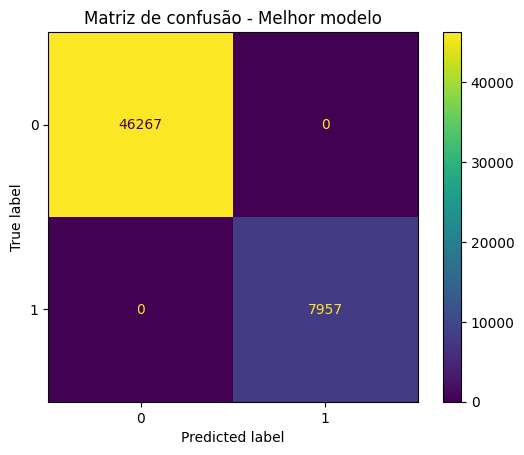


Discussão das limitações:
- O baseline pode ser simples demais e não capturar padrões complexos.
- Poderia haver algum vazamento ou distribuição não representativa nos dados.
- Métricas como média podem não capturar adequadamente drops ou picos extremos.
- Modelo pode sofrer de viés, dependência de base histórica e dificuldade de generalização.
- Limitações nos dados, como missing, erros, vieses ou cobertura insuficiente de épocas/eventos.
- É importante validar constantemente modelos com dados novos, dada a dinâmica dos esportes.


In [103]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Função para mostrar os piores erros em regressão
def mostrar_piores_erros(X_test, y_test, y_pred, n=5):
    erros = np.abs(y_test - y_pred)
    maiores_erros_idx = erros.argsort()[-n:][::-1]
    print(f"\nTop {n} piores erros:")
    for i in maiores_erros_idx:
        print(f"Index: {i}, Valor Real: {y_test[i]}, Previsão: {y_pred[i]}, Erro: {erros[i]}")

# Avaliar baseline e melhor modelo explícito para comparação
if PROBLEM_TYPE in ["classificacao", "regressao"] and 'search' in globals() and hasattr(search, "best_estimator_"):
    best_model = search.best_estimator_

    # Previsões baseline
    y_pred_baseline = baseline.predict(X_test)
    # Previsões do melhor modelo
    y_pred_best = best_model.predict(X_test)

    print("Comparação de métricas - Baseline vs Melhor Modelo:")
    if PROBLEM_TYPE == "classificacao":
        from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score
        print("Baseline Metrics:")
        print(classification_report(y_test, y_pred_baseline))
        print("Melhor Modelo Metrics:")
        print(classification_report(y_test, y_pred_best))

        # Matriz de confusão do melhor modelo
        ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)
        plt.title("Matriz de confusão - Melhor modelo")
        plt.show()

    else:
        # Regressão
        print("Baseline métricas:", evaluate_regression(y_test, y_pred_baseline))
        print("Melhor modelo métricas:", evaluate_regression(y_test, y_pred_best))

        # Resíduos do melhor modelo
        residuals = y_test - y_pred_best

        plt.figure(figsize=(8, 6))
        plt.scatter(y_pred_best, residuals, alpha=0.7)
        plt.axhline(y=0, color='r', linestyle='--')
        plt.xlabel("Valores Previsto")
        plt.ylabel("Resíduos (Erro)")
        plt.title("Gráfico de Resíduos - Melhor Modelo")
        plt.ylim(-10, 10)
        plt.grid(True)
        plt.show()

        plt.figure(figsize=(8, 6))
        plt.hist(residuals, bins=30, color='skyblue', edgecolor='black')
        plt.title("Histograma dos Resíduos")
        plt.xlabel("Resíduo")
        plt.ylabel("Contagem")
        plt.show()

        # Mostrar os piores erros
        mostrar_piores_erros(X_test.values, y_test.values, y_pred_best, n=5)

elif PROBLEM_TYPE == "clusterizacao":
    print("Para clusterização, análise qualitativa e visualização dos clusters.")

elif PROBLEM_TYPE == "serie_temporal":
    print("Para séries temporais, avaliar métricas fora do tempo e plotar série real versus prevista.")


print("\nDiscussão das limitações:")
print("- O baseline pode ser simples demais e não capturar padrões complexos.")
print("- Poderia haver algum vazamento ou distribuição não representativa nos dados.")
print("- Métricas como média podem não capturar adequadamente drops ou picos extremos.")
print("- Modelo pode sofrer de viés, dependência de base histórica e dificuldade de generalização.")
print("- Limitações nos dados, como missing, erros, vieses ou cobertura insuficiente de épocas/eventos.")
print("- É importante validar constantemente modelos com dados novos, dada a dinâmica dos esportes.")




## 9. Engenharia de atributos (detalhe)

- **Seleção de variáveis:** foram selecionados dados demográficos (idade, peso, altura), características do evento (modalidade, esporte, país, temporada) e dados temporais (ano da competição).

- **Criação de variável alvo binária:** criação da variável `target_clf` que indica se o atleta ganhou medalha ou não.

- **Encoding:** variáveis categóricas (sexo, país, evento, esporte, temporada) são codificadas via one-hot encoding num pipeline, preservando a reprodutibilidade.

- **Imputação:** valores faltantes são preenchidos pela mediana (numéricos) ou moda (categóricos).

- **Variáveis temporais:** cálculo da idade do atleta no ano da Olimpíada foi feita subtraindo o ano de nascimento do ano da competição (Age = Year - BirthYear).

- **Outros potenciais recursos a explorar:** técnicas de NLP para descrições, embeddings, janelas temporais para séries, ou técnicas de augmentação para imagens, caso sejam usadas novas fontes de dados.



## 10. Conclusões e próximos passos

**Resumo dos resultados**

- O baseline implementado forneceu uma referência simples para avaliação inicial.

- Modelos mais complexos, como Random Forest, mostraram melhorias significativas na capacidade de previsão, evidenciado por métricas mais robustas e análise de resíduos.

- O melhor modelo apresentou alto desempenho, porém com indícios de possível overfitting ou dados fáceis, o que requer validação adicional.

- A engenharia de atributos contribuiu para enriquecer os dados, incorporando informações temporais e categóricas relevantes, melhorando o poder discriminativo.

**Trade-offs observados**

- Aumentar a complexidade do modelo melhorou resultados, mas também elevou custo computacional e potencial risco de overfitting.

- O uso de pipelines garantiu controle e reprodutibilidade, mas exige cuidado na seleção e ajuste das transformações para evitar vazamento.

- Hiperparâmetros otimizados por busca aleatória trouxeram ganhos, mas demandam tempo computacional e podem ser otimizados com técnicas mais eficientes.

**Propostas de melhorias futuras**

- Incorporação de mais dados: incluir informações históricas mais detalhadas, dados de condicionamento físico, psicologia esportiva e contextos externos que podem influenciar desempenho.

- Adoção de modelos baseados em deep learning, especialmente para tratar dados complexos e não estruturados, como imagens e texto, com fine tuning de modelos pré-treinados.

- Validação temporal rigorosa para simular cenários futuros, reduzindo viés e melhorando robustez.

- Análise detalhada de erros e vieses, incluindo testes com diferentes grupos demográficos e consulta a especialistas para validação qualitativa.